<a href="https://colab.research.google.com/github/Alaa-f-Abdalaal/CNN-/blob/main/NTI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# # Import supplementary visualization code visuals.py
# import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("/content/adult.csv")

# Success - Display the first record
display(data.head())

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
data['Occupation']

,Occupation
0,Adm-clerical
1,Exec-managerial
2,Handlers-cleaners
3,Handlers-cleaners
4,Prof-specialty
...,...
32556,Tech-support
32557,Machine-op-inspct
32558,Adm-clerical
32559,Adm-clerical


In [19]:
# TODO: Total number of records
data['Income'] = data['Income'].str.strip()
n_records = data.shape[0]
# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data['Income'] == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['Income'] == '<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 32561
Individuals making more than $50,000: 7841
Individuals making at most $50,000: 24720
Percentage of individuals making more than $50,000: 24.080955744602438%


In [20]:
# Split the data into features and target label
income_raw = data['Income']
features_raw = data.drop('Income', axis = 1)

# Visualize skewed continuous features of original data
# vs.distribution(data)


In [21]:
# Log-transform the skewed features
skewed = ['Capital Gain', 'capital loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
# vs.distribution(features_log_transformed, transformed = True)



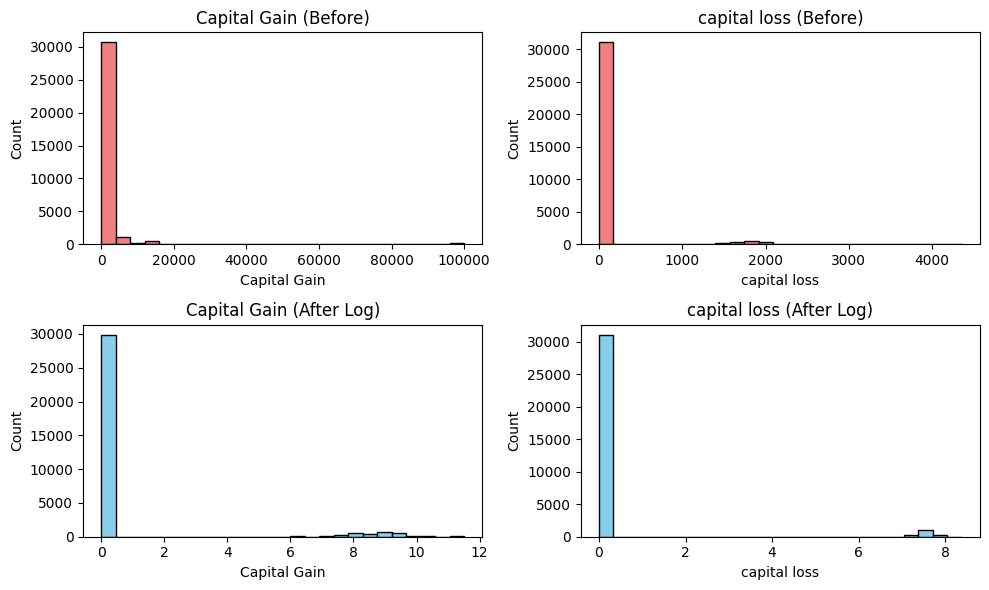

In [22]:
import matplotlib.pyplot as plt
import numpy as np

skewed = ['Capital Gain', 'capital loss']


plt.figure(figsize=(10, 6))

for i, feature in enumerate(skewed):
# before
    plt.subplot(2, len(skewed), i + 1)
    plt.hist(features_raw[feature], bins=25, color='lightcoral', edgecolor='black')
    plt.title(f"{feature} (Before)")
    plt.xlabel(feature)
    plt.ylabel("Count")
# after
    plt.subplot(2, len(skewed), i + 1 + len(skewed))
    plt.hist(features_log_transformed[feature], bins=25, color='skyblue', edgecolor='black')
    plt.title(f"{feature} (After Log)")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [23]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['Age','Final Weight','EducationNum','Capital Gain','capital loss','Hours per Week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [24]:
income_raw.describe()

,Income
count,32561
unique,2
top,<=50K
freq,24720


In [25]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final =pd.get_dummies(features_log_minmax_transform)
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)
# TODO: Encode the 'income_raw' data to numerical values
income = pd.get_dummies(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

108 total features after one-hot encoding.
['Age', 'Final Weight', 'EducationNum', 'Capital Gain', 'capital loss', 'Hours per Week', 'Workclass_ ?', 'Workclass_ Federal-gov', 'Workclass_ Local-gov', 'Workclass_ Never-worked', 'Workclass_ Private', 'Workclass_ Self-emp-inc', 'Workclass_ Self-emp-not-inc', 'Workclass_ State-gov', 'Workclass_ Without-pay', 'Education_ 10th', 'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th', 'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th', 'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors', 'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters', 'Education_ Preschool', 'Education_ Prof-school', 'Education_ Some-college', 'Marital Status_ Divorced', 'Marital Status_ Married-AF-spouse', 'Marital Status_ Married-civ-spouse', 'Marital Status_ Married-spouse-absent', 'Marital Status_ Never-married', 'Marital Status_ Separated', 'Marital Status_ Widowed', 'Occupation_ ?', 'Occupation_ Adm-clerical', 'Occupa

In [26]:
from re import X
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split the 'features' and 'income' data into training and testing sets
# here do a train test split with test_size(20%), random state(0)
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size=0.2, random_state=0)

# Show the results of the split
# note we want to predict the income

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 26048 samples.
Testing set has 6513 samples.


In [27]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data
# encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+TN+FN+FP)
recall = recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.

beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results
# print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
# print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
print(f"Accuracy score: {accuracy}")
print(f"F-score: {fscore}")
#


Accuracy score: <=50K    0.75919
>50K     0.24081
dtype: float64
F-score: <=50K    0.797605
>50K     0.283919
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [28]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    #tree_param={'criterion':['gini', 'entropy']
          #      ,'max_depth':[1,3,6,8,9]
           #     ,'min_samples_split':[2,5,7,9]
            #    ,'min_samples_leaf':[1,3,5,7]}
    results = {}
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train [:sample_size],y_train [:sample_size])
    end = time() # Get end time
    # TODO: Calculate the training time
    results['train_time'] = end-start
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test [:sample_size])
    predictions_train = learner.predict(X_train [:sample_size])
    end = time() # Get end time

    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start

    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train [:sample_size],predictions_train)

    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test [:sample_size],predictions_test)

    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train [:sample_size],predictions_train,beta=1)
    # results['f_train'] = f1(y_train [:sample_size],predictions_train)


    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test [:sample_size],predictions_test,beta=1)

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print('\n')
    # Return the results
    return results

In [31]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=42)
clf_B = RandomForestClassifier(random_state=42)
clf_C =DecisionTreeClassifier(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 =int(samples_100*0.1)
samples_1 = int(samples_100*0.01)




# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
# vs.evaluate(results, accuracy, fscore)

NameError: name 'f1' is not defined

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

import numpy as np
y_train_1d = np.argmax(y_train, axis=1) if len(y_train.shape) > 1 else y_train
y_test_1d = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# TODO: Initialize the classifier
clf = LogisticRegression(max_iter=1000, random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = { 'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = grid_obj = GridSearchCV(clf, parameters, scoring=scorer)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train_1d)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8415
F-score on testing data: 0.8840

Optimized Model
------
Final accuracy score on the testing data: 0.8409
Final F-score on the testing data: 0.8839


In [33]:
# TODO: Import a supervised learning model that has 'feature_importances_'

from sklearn.ensemble import AdaBoostClassifier
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train_1d)

# TODO: Extract the feature importances using .feature_importances_
importances =  model.feature_importances_

# Plot
# vs.feature_plot(importances, X_train, y_train)

In [34]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8409
F-score on testing data: 0.8839

Final Model trained on reduced data
------
Accuracy on testing data: 0.8283
F-score on testing data: 0.8735
